
<hr/>

# Introduction to Data Science
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Decision trees
- Cross-validation
- Random forests

<hr/>

<h1><font color="darkblue">Decision Tree</font></h1>

- Recursive partitioning of the training dataset

> At a given node with dataset $D$ we look for the
> best split 
> <br>
> <br>
> $\theta = $ (feature $j$, threshold $t$) 
> <br>
> <br>
> such that the 
> partitions $D_{\textrm{left}}(\theta)$ and $D_{\textrm{right}}(\theta)$ have minimal *impurity*
> <br>
> <br>
> $\displaystyle I(\theta) = \frac{n_{\textrm{left}}}{n}\, H\Big(D_{\textrm{left}}(\theta)\Big) + \frac{n_{\textrm{right}}}{n}\,H\Big(D_{\textrm{right}}(\theta)\Big)$

- Different impurity functions $H(\cdot)$

> E.g., Gini with $K$ classes in the partition $D$
> <br>
> <br>
>$\displaystyle H(D) = \sum_{i=1}^K p_i (1-p_i)$
> <br>
> <br>
> Or variance for regression


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

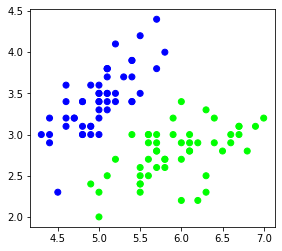

In [3]:
subplot(111,aspect='equal'); 
scatter(X[:,0],X[:,1],c=c,cmap=cm.brg);

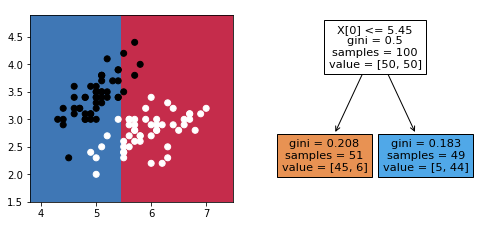

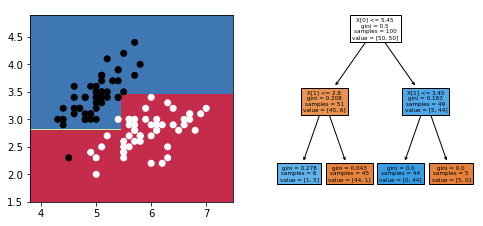

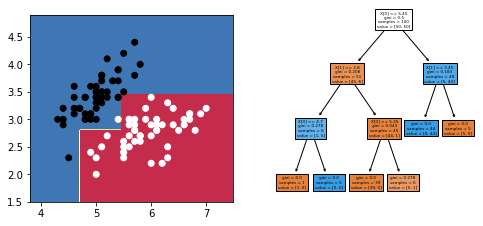

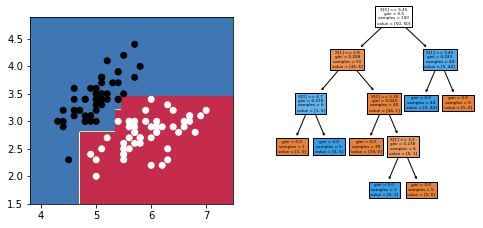

In [4]:
from sklearn import tree
# grid of points within the limits
h = 0.01
x,y = meshgrid(arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               arange(X[:,1].min()-.5, X[:,1].max()+.5, h))
grid = np.c_[x.ravel(),y.ravel()]

# decision-surfaces as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    z = clf.fit(X,c).predict(grid).reshape(x.shape)
    figure(figsize=(8,4)); 
    plt.subplot(121,aspect='equal')
    contourf(x, y, z, cmap=cm.Spectral_r)
    scatter(X[:,0], X[:,1], c=c, cmap=cm.gray);
    plt.subplot(122,aspect='equal')
    tree.plot_tree(clf, filled=True)
    plt.show()

In [5]:
from sklearn.model_selection import cross_val_score

# quality as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    s = cross_val_score(clf, X,c, cv=10)
    print (depth, s.mean(), s.std(), s.min())

1 0.89 0.08306623862918074 0.8
2 0.97 0.045825756949558386 0.9
3 0.97 0.045825756949558386 0.9
4 0.97 0.045825756949558386 0.9


In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

k_fold = StratifiedKFold(n_splits=10) 
# k_fold = KFold(n_splits=10,shuffle=True,random_state=42) 

scores = dict() # store the cv score of each split
for train, test in k_fold.split(X, c):
# for train, test in k_fold.split(X):
    for depth in range(1,5):
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        clf.fit(X[train],c[train])
        score = clf.score(X[test],c[test])
        if depth not in scores: scores[depth] = [] # empty 
        scores[depth].append(score) # list for this depth

for depth in scores:
    s = np.array(scores[depth])
    print (depth, s.mean(), s.std(), s.min())

1 0.89 0.08306623862918074 0.8
2 0.97 0.045825756949558386 0.9
3 0.97 0.045825756949558386 0.9
4 0.97 0.045825756949558386 0.9


<h1><font color="darkblue">Random Forest</font></h1>

### Random Tree

- Hard to pick the *best* in high dimensions (i.e., very expensive)

> Instead we pick a number of random directions to search<br/>
> and take the optimal split among those

- A randomized tree will not be optimal but much faster to build

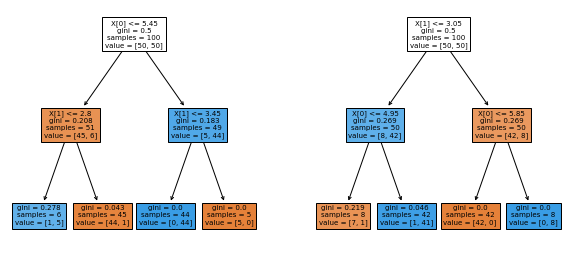

In [7]:
clf = tree.DecisionTreeClassifier(max_depth=2)
z = clf.fit(X,c).predict(grid).reshape(x.shape)
figure(figsize=(10,5)); 
plt.subplot(121,aspect='equal')
tree.plot_tree(clf, filled=True)

clf = tree.DecisionTreeClassifier(max_depth=2, max_features = 1, random_state = 553)
z = clf.fit(X,c).predict(grid).reshape(x.shape)
plt.subplot(122,aspect='equal')
tree.plot_tree(clf, filled=True)
plt.show()

### Forest of Random Trees

- Create multiple randomized trees to classify

> Combine the results, e.g., voting

- Check out **Boostrap** and **Bagging**

> Boostrap : repeatedly sampling observations from the original data set with replacement
> e.g. bias_variance_decomp in mlxtend.evaluate

> Bagging : average all the predictions to reduce variance.


<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg" alt = "Random_Forest" width=400>

array([1. , 0.9, 1. , 1. , 1. , 1. , 0.9, 1. , 0.9, 1. ])

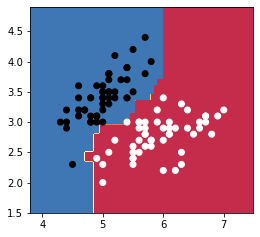

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=50,max_depth=2)
z = clf.fit(X,c).predict(grid).reshape(x.shape)

figure(figsize=(4,4)); subplot(111,aspect='equal')
contourf(x,y,z, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=c, cmap=cm.gray);

cross_val_score(clf, X,c, cv=10)

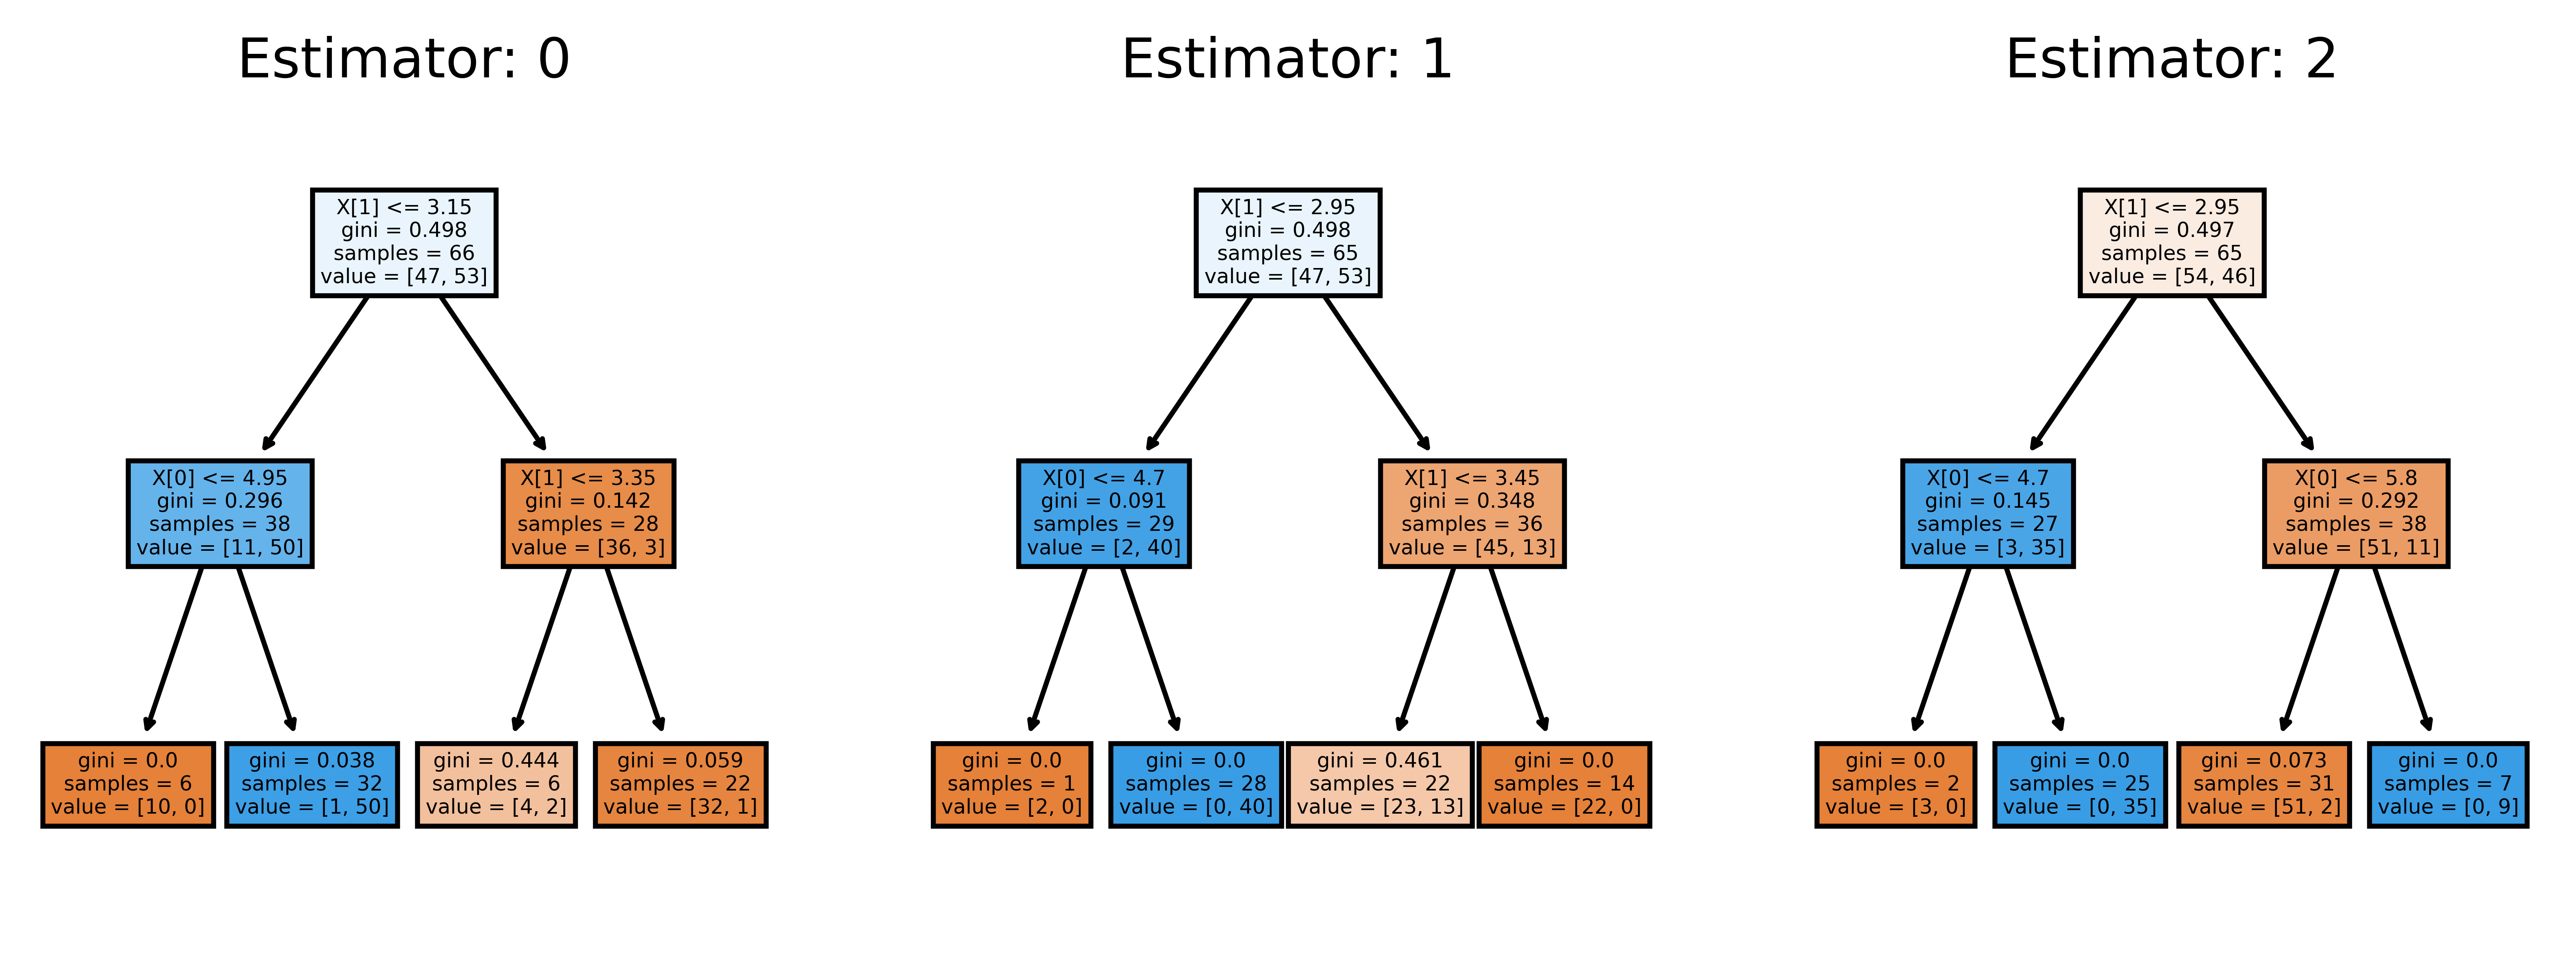

In [9]:
rf = RandomForestClassifier(n_estimators=3,max_depth=2)
rf.fit(X,c)

fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (9,3), dpi=900)
for index in range(0, 3):
    tree.plot_tree(rf.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [10]:
from mlxtend.evaluate import bias_variance_decomp     # http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/#bias-variance-decomposition
from sklearn.model_selection import train_test_split

# compare the "variance"
X = iris.data
c = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, c,test_size=0.3,random_state=553,shuffle=True,stratify=c)

clf = tree.DecisionTreeClassifier(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)


Average expected loss: 0.108
Average bias: 0.067
Average variance: 0.063


In [11]:
from sklearn.ensemble import BaggingClassifier

clf = tree.DecisionTreeClassifier(random_state=123)
bag = BaggingClassifier(base_estimator=clf,
                        n_estimators=100,
                        random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.087
Average bias: 0.067
Average variance: 0.035


In [12]:
clf = RandomForestClassifier(n_estimators=100,random_state=123)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.083
Average bias: 0.067
Average variance: 0.025


### Assumptions and Limitations

- Axis parallel boundaries might be suboptimal

- But there is no need for a distance function

- And improved by random forest with many trees

also

- Improvements in the estimation error by random forest
cf. central limit theorem



### Feature Selection

- How frequently do we use a feature to split?

> It says something about how useful that feature is

In [13]:
clf.feature_importances_

array([0.07657234, 0.01295705, 0.50567666, 0.40479395])

### Divide and Conquer

- These methods are applicable to regression problems

> Minimize the variance of the left and right partitions
> <br>
> e.g., piecewise constant

- Useful concepts to consider to build complex methods



### Exercise

- What RF classifier gives the best result on the IRIS dataset?

> Vary the relevant parameters to find the best one!


In [14]:
# useful trick
[i*i for i in range(4)]

[0, 1, 4, 9]

In [15]:
# even conditionals
[(i, j, 4*i+j) for i in range(4) for j in range(4-i) if i*j>=2]

[(1, 2, 6), (2, 1, 9)]

In [16]:
# alias for short
RF = RandomForestClassifier

In [17]:
# labeled data
X = iris.data
c = iris.target

In [18]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42) 

# Create list of classifiers
clfs = [((n,d,f,c), RF(max_depth=d, n_estimators=n, max_features=f, criterion=c)) 
        for c in ['gini','entropy'] 
        for d in [2,3] 
        for n in [50,200] 
        for f in [2,3]]
print (len(clfs))

16


In [20]:
# Use k-fold Cv to find the best classifier
for i, (train, test) in enumerate(k_fold.split(X)):
    for param, clf in clfs:
        score = clf.fit(X[train,:],c[train]).score(X[test,:],c[test])
        print (f'{i}   {param}   \t{score}')

0   (50, 2, 2, 'gini')   	1.0
0   (50, 2, 3, 'gini')   	1.0
0   (200, 2, 2, 'gini')   	1.0
0   (200, 2, 3, 'gini')   	1.0
0   (50, 3, 2, 'gini')   	1.0
0   (50, 3, 3, 'gini')   	1.0
0   (200, 3, 2, 'gini')   	1.0
0   (200, 3, 3, 'gini')   	1.0
0   (50, 2, 2, 'entropy')   	1.0
0   (50, 2, 3, 'entropy')   	1.0
0   (200, 2, 2, 'entropy')   	1.0
0   (200, 2, 3, 'entropy')   	1.0
0   (50, 3, 2, 'entropy')   	1.0
0   (50, 3, 3, 'entropy')   	1.0
0   (200, 3, 2, 'entropy')   	1.0
0   (200, 3, 3, 'entropy')   	1.0
1   (50, 2, 2, 'gini')   	1.0
1   (50, 2, 3, 'gini')   	1.0
1   (200, 2, 2, 'gini')   	1.0
1   (200, 2, 3, 'gini')   	1.0
1   (50, 3, 2, 'gini')   	1.0
1   (50, 3, 3, 'gini')   	1.0
1   (200, 3, 2, 'gini')   	1.0
1   (200, 3, 3, 'gini')   	1.0
1   (50, 2, 2, 'entropy')   	1.0
1   (50, 2, 3, 'entropy')   	1.0
1   (200, 2, 2, 'entropy')   	1.0
1   (200, 2, 3, 'entropy')   	1.0
1   (50, 3, 2, 'entropy')   	1.0
1   (50, 3, 3, 'entropy')   	1.0
1   (200, 3, 2, 'entropy')   	1.0
1   (200, 

### Automation: Pipeline and GridSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



### Unhomework

Go to http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and modify the code to run all classifiers that we learned so far